In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 자전거 데이터 캐글
https://www.kaggle.com/c/bike-sharing-demand/overview

#### 데이터 톺아보기

In [6]:
# 데이터 불러오기
bike_df = pd.read_csv('data/bike_train.csv')
bike_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
bike_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### 데이터 전처리

In [7]:
# 문자열을 datetime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
# 년 추출 
# 월 추출 
# 일 추출 
# 시간 추출 
# 요일 추출 

bike_df['year'] = bike_df['datetime'].dt.year
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df['dayofweek'] = bike_df['datetime'].dt.dayofweek
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


In [8]:
# 필요없는 컬럼 삭제하기 (날짜는 열을 다 나눴고, resgistered+casual = count라서.)
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns,axis=1, inplace=True)
bike_df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


#### 모델링을 위한 시각화

In [ ]:
# EDA를 위한 시각화하기
# 조건에 따른 대여량 시각화

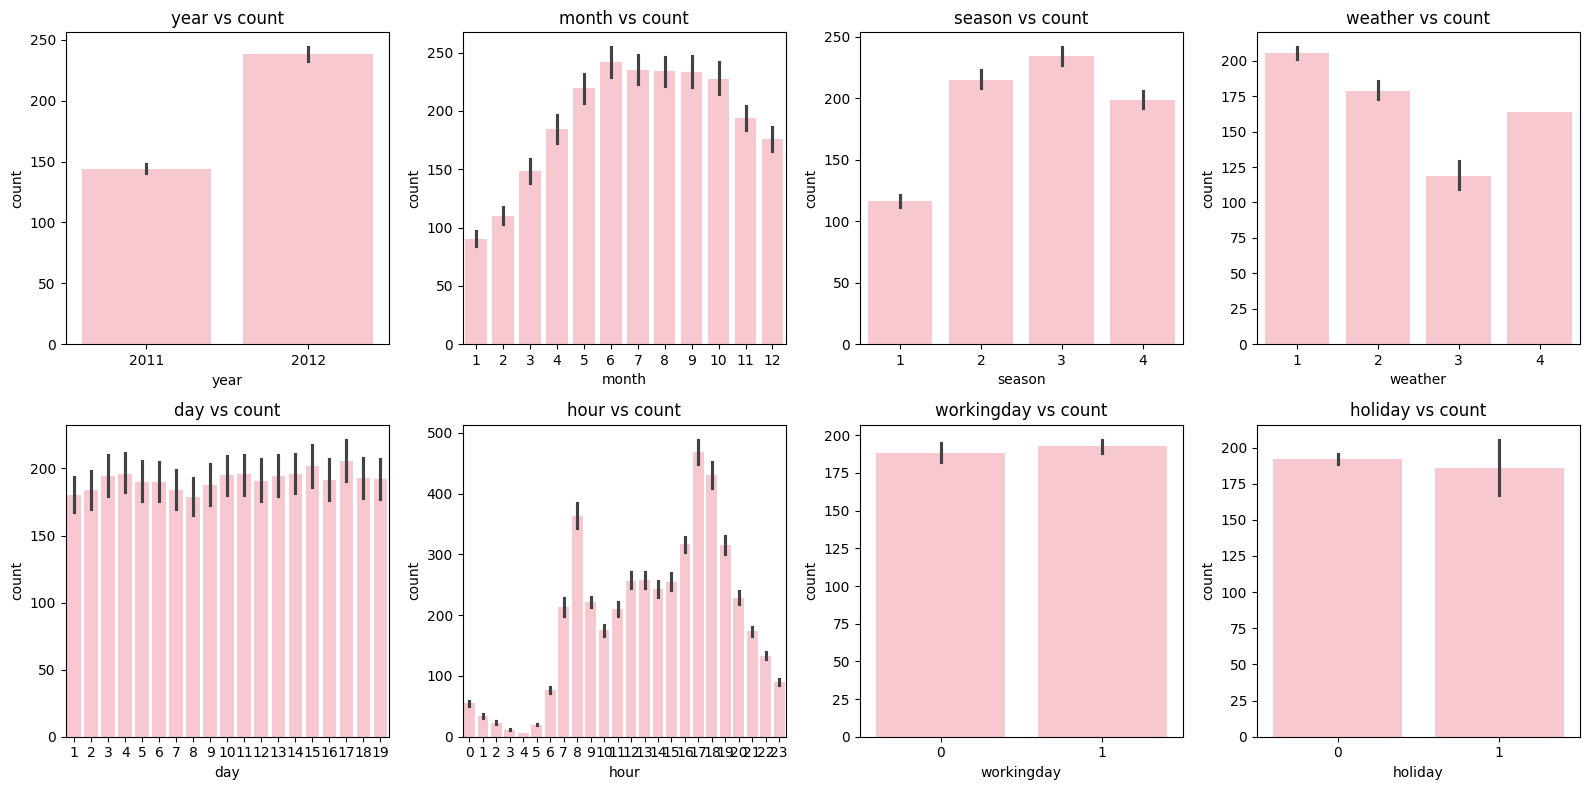

In [37]:
# TODO: 막대 그래프(년, 월, 시즌, 날씨, 일, 시간, 휴일, 근무일)
import seaborn as sns

plt.figure(figsize=(16, 8))

cols = ['year','month','season','weather','day','hour','workingday','holiday']

for i, col in enumerate(cols):
    plt.subplot(2, 4, i + 1)
    sns.barplot(data=bike_df, x=col, y='count', color='pink')
    plt.title(f'{col} vs count')

plt.tight_layout()
plt.show()

<Axes: >

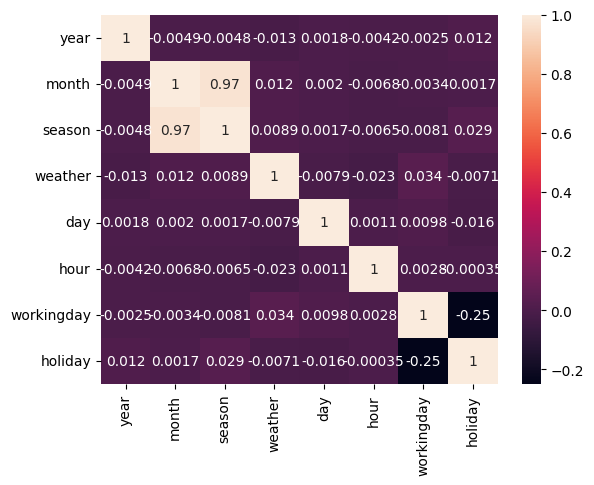

In [14]:
bike_corr = bike_df[['year','month','season','weather','day','hour','workingday','holiday']].corr()

sns.heatmap(bike_corr, annot=True)

In [ ]:
# 의미 도출 

#### 모델링 시작

In [38]:
# 변수선택

X = bike_df.drop(['count','temp','day'],axis=1)
y = bike_df['count']

In [42]:
# 훈련세트/테스트세트 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8164, 11) (2722, 11) (8164,) (2722,)


In [ ]:
# 모델 생성 및 훈련

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
pred = lr_model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test,pred):.2f}')
print(f'r2_score: {r2_score(y_test,pred):.2f}')
print(f'train: {lr_model.score(X_train,y_train):.2f}') #훈련 데이터의 R2 스코어
print(f'test: {lr_model.score(X_test,y_test):.2f}') #테스트 데이터의 R2스코어

MSE: 21137.41
r2_score: 0.39
train: 0.39
test: 0.39


In [55]:
# 다른 모델 사용

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
knn_model = KNeighborsRegressor()
knn_model.fit(X_train,y_train)
pred = knn_model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test,pred):.2f}')
print(f'r2_score: {r2_score(y_test,pred):.2f}')
print(f'train: {knn_model.score(X_train,y_train):.2f}')
print(f'test: {knn_model.score(X_test,y_test):.2f}')

#train 이 test보다 수치가 큼 : 과적합 되었다.

MSE: 13977.34
r2_score: 0.59
train: 0.73
test: 0.59


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
pred = dt_model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test,pred):.2f}')
print(f'r2_score: {r2_score(y_test,pred):.2f}')
print(f'train: {dt_model.score(X_train,y_train):.2f}')
print(f'test: {dt_model.score(X_test,y_test):.2f}')

#r2계수가 높아졌다. 과적합이긴 하지만 이게 나은듯

MSE: 3221.95
r2_score: 0.91
train: 1.00
test: 0.91


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(random_state=10)
rf_model.fit(X_train,y_train)
pred = rf_model.predict(X_test)

print(f'MSE: {mean_squared_error(y_test,pred):.2f}') #평균적으로 “얼마나 틀렸는지”를 제곱 패널티로 본 값 (값이 작을수록 좋음)
print(f'r2_score: {r2_score(y_test,pred):.2f}') # “설명력” 지표 (1에 가까울수록 좋음)
print(f'train: {rf_model.score(X_train,y_train):.2f}') # 훈련 데이터에서의 설명력 - 모델이 훈련 데이터를 얼마나 잘 외웠는지 (score():회귀 모델 → R² 반환)
print(f'test: {rf_model.score(X_test,y_test):.2f}') # 일반화 성능 지표 - 새로운 데이터에 대해 얼마나 잘 맞추는지 (테스트 데이터에서의 R²)


MSE: 1630.79
r2_score: 0.95
train: 0.99
test: 0.95


In [ ]:
#스케일링 전 데이터
#linear model
MSE: 21137.41
r2_score: 0.39
train: 0.39
test: 0.39

#KNN
MSE: 13977.34
r2_score: 0.59
train: 0.73
test: 0.59

#Tree
MSE: 3221.95
r2_score: 0.91
train: 1.00
test: 0.91

#Random Forest
MSE: 1630.79
r2_score: 0.95
train: 0.99
test: 0.95

모델만 바꿔도 분석 성능이 좋아진다.

#### 스케일링

<Axes: >

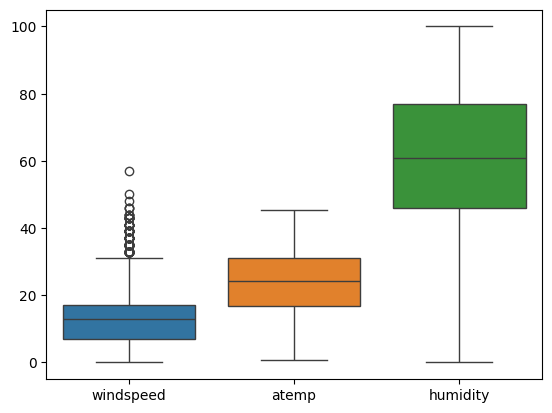

In [63]:
sns.boxplot(X_train[['windspeed','atemp','humidity']])

<Axes: >

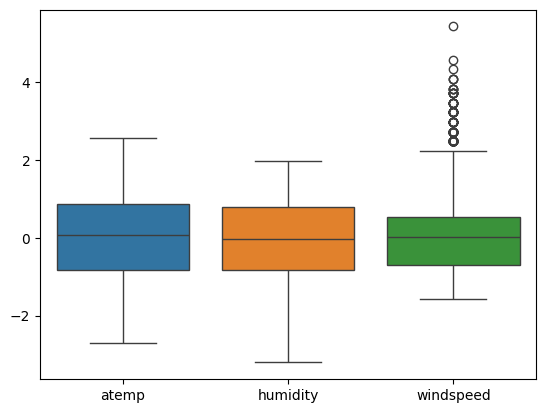

In [70]:
# 수치형변수 스케일링 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['atemp', 'humidity', 'windspeed']

X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features]  = scaler.transform(X_test[numerical_features])
sns.boxplot(X_train[numerical_features])

In [72]:
# 범주형변수 원핫인코딩 

from sklearn.preprocessing import OneHotEncoder

categorical_features = ['season','weather','year','month','hour','dayofweek']
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

X_train_ohe = ohe.fit_transform(X_train[categorical_features])
X_test_ohe = ohe.transform(X_test[categorical_features])

ohe_col = ohe.get_feature_names_out(categorical_features)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_col,index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_col,index=X_test.index)

In [74]:
# 최종 훈련 테스트 데이터 완성
X_train_preprocessed = pd.concat([X_train[numerical_features],X_train_ohe], axis=1)
X_test_preprocessed = pd.concat([X_test[numerical_features],X_test_ohe], axis=1)

In [75]:
# 최종 훈련 테스트 데이터 만들어서 모델 생성 및 훈련

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model2 = LinearRegression()
lr_model2.fit(X_train_preprocessed,y_train)
pred = lr_model2.predict(X_test_preprocessed)

print(f'MSE: {mean_squared_error(y_test,pred):.2f}')
print(f'r2_score: {r2_score(y_test,pred):.2f}')
print(f'train: {lr_model2.score(X_train_preprocessed,y_train):.2f}')
print(f'test: {lr_model2.score(X_test_preprocessed,y_test):.2f}')

MSE: 10646.35
r2_score: 0.69
train: 0.70
test: 0.69


In [77]:
# 다른 모델 사용

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_preprocessed,y_train)
pred = knn_model.predict(X_test_preprocessed)

print(f'MSE: {mean_squared_error(y_test,pred):.2f}')
print(f'r2_score: {r2_score(y_test,pred):.2f}')
print(f'train: {knn_model.score(X_train_preprocessed,y_train):.2f}')
print(f'test: {knn_model.score(X_test_preprocessed,y_test):.2f}')

MSE: 14549.15
r2_score: 0.58
train: 0.72
test: 0.58


In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_preprocessed,y_train)
pred = dt_model.predict(X_test_preprocessed)

print(f'MSE: {mean_squared_error(y_test,pred):.2f}')
print(f'r2_score: {r2_score(y_test,pred):.2f}')
print(f'train: {dt_model.score(X_train_preprocessed,y_train):.2f}')
print(f'test: {dt_model.score(X_test_preprocessed,y_test):.2f}')

#r2계수가 높아졌다. 과적합이긴 하지만 이게 나은듯

MSE: 6876.80
r2_score: 0.80
train: 1.00
test: 0.80


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(random_state=10)
rf_model.fit(X_train_preprocessed,y_train)
pred = rf_model.predict(X_test_preprocessed)

print(f'MSE: {mean_squared_error(y_test,pred):.2f}') #평균적으로 “얼마나 틀렸는지”를 제곱 패널티로 본 값 (값이 작을수록 좋음)
print(f'r2_score: {r2_score(y_test,pred):.2f}') # “설명력” 지표 (1에 가까울수록 좋음)
print(f'train: {rf_model.score(X_train_preprocessed,y_train):.2f}') # 훈련 데이터에서의 설명력 - 모델이 훈련 데이터를 얼마나 잘 외웠는지 (score():회귀 모델 → R² 반환)
print(f'test: {rf_model.score(X_test_preprocessed,y_test):.2f}') # 일반화 성능 지표 - 새로운 데이터에 대해 얼마나 잘 맞추는지 (테스트 데이터에서의 R²)


MSE: 3919.59
r2_score: 0.89
train: 0.99
test: 0.89


In [ ]:
#스케일링 후 데이터
#linear model
MSE: 10646.35
r2_score: 0.69
train: 0.70
test: 0.69

#KNN
MSE: 14549.15
r2_score: 0.58
train: 0.72
test: 0.58

#Tree
MSE: 6876.80
r2_score: 0.80
train: 1.00
test: 0.80

#Random Forest
MSE: 3919.59
r2_score: 0.89
train: 0.99
test: 0.89

#### 모델 사용해보기 : 새로운 데이터 예측하기

In [ ]:
# 새로운 데이터 예측 하기 

new_row = {
    "season": 2, "holiday": 0, "workingday": 1, "weather": 1,
    "atemp": 20.5, "humidity": 55, "windspeed": 0.12,
    "year": 2025, "month": 5, "day": 1, "hour": 17, "dayofweek": 3
}

new_df = pd.DataFrame([new_row])


print(f"예상 대여 수: {count_pred:.0f}대")